# 02 - Regression

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./data/housing.csv.zip')
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

# EDA

Look at the median_house_value variable. Does it have a long tail?

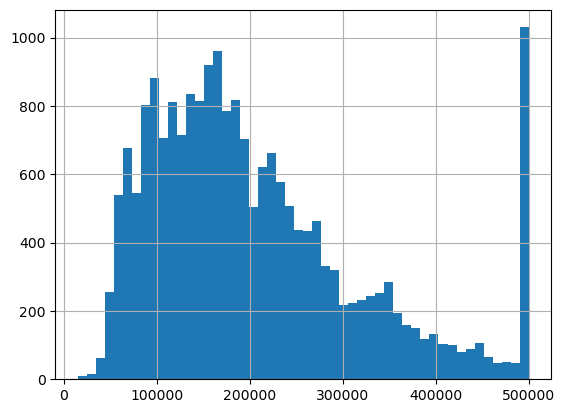

In [3]:
df.median_house_value.hist(bins=50);

The tail is not to long

In [4]:
# For the rest of the homework, you'll need to use only these columns:
columns = [ 'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value']

# Question 1

Find a feature with missing values. How many missing values does it have?

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Answer: 207

# Question 2

What's the median (50% percentile) for variable 'population'?

In [6]:
df.population.median()

1166.0

In [7]:
np.percentile(df.population, 50)

1166.0

Answer: 1166

## Split the data

In [8]:
# Shuffle the initial dataset, use seed 42.
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [9]:
idx[:10]

array([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,
        5723])

In [10]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val
n, n_train, n_val, n_test

(20640, 12384, 4128, 4128)

In [11]:
df_train = df.iloc[idx[:n_train]][columns]
df_val = df.iloc[idx[n_train:n_train+n_val]][columns]
df_test = df.iloc[idx[n_train+n_val:]][columns]
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [12]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [13]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train.pop('median_house_value'))
y_val = np.log1p(df_val.pop('median_house_value'))
y_test = np.log1p(df_test.pop('median_house_value'))
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [14]:
# Make sure that the target value ('median_house_value') is not in your dataframe.
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


# Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

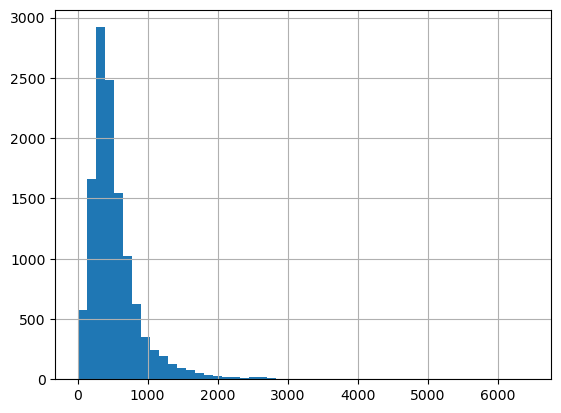

In [15]:
df_train.total_bedrooms.hist(bins=50);

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [17]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [18]:
fills_na = {'zeros':0, 'mean': df_train.total_bedrooms.mean(), 'median': df_train.total_bedrooms.median()}
for fill_na_var, fill_na_value in fills_na.items():
    X_train = df_train.fillna(fill_na_value)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = df_val.fillna(fill_na_value)
    y_val_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_val_pred)
    print(fill_na_var, '\t', round(fill_na_value), '\t rmse',round(score,2))
    

zeros 	 0 	 rmse 0.33
mean 	 533 	 rmse 0.33
median 	 431 	 rmse 0.33


Answer: Both are equally good

# Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r

In [19]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    XTX = np.dot(X.T, X) 
    XTX = XTX + r * np.eye(len(XTX))
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [20]:
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)

rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scores = []
for r in rs: 
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)
    scores.append(score)
    print(r,'\trmse', round(score,2))

0 	rmse 0.33
1e-06 	rmse 0.33
0.0001 	rmse 0.33
0.001 	rmse 0.33
0.01 	rmse 0.33
0.1 	rmse 0.33
1 	rmse 0.33
5 	rmse 0.34
10 	rmse 0.34


Answer: r = 0 gives the best RMSE

# Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [21]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
        
    df_train = df.iloc[idx[:n_train]][columns]
    df_val = df.iloc[idx[n_train:n_train+n_val]][columns]
    df_test = df.iloc[idx[n_train+n_val:]][columns]
        
    df_train.reset_index(drop=True,inplace=True)
    df_val.reset_index(drop=True,inplace=True)
    df_test.reset_index(drop=True,inplace=True)
    
    y_train = np.log1p(df_train.pop('median_house_value'))
    y_val = np.log1p(df_val.pop('median_house_value'))
    y_test = np.log1p(df_test.pop('median_house_value'))
    
    X_train = df_train.fillna(0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = df_val.fillna(0)
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)  
    scores.append(score)
    
    print('seed',seed,'\trmse:', score)

seed 0 	rmse: 0.33884304805305226
seed 1 	rmse: 0.33623872559558443
seed 2 	rmse: 0.3320912318837264
seed 3 	rmse: 0.3405153609032864
seed 4 	rmse: 0.33890240665719296
seed 5 	rmse: 0.3434866725716855
seed 6 	rmse: 0.3451980953098907
seed 7 	rmse: 0.3395989927401255
seed 8 	rmse: 0.3466230873184388
seed 9 	rmse: 0.3365926124175644


In [22]:
np.std(scores)

0.004170771946645354

Answer: 0.005

# Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [23]:
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train+n_val]][columns]
df_test = df.iloc[idx[n_train+n_val:]][columns]

df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

y_train = np.log1p(df_train.pop('median_house_value'))
y_test = np.log1p(df_test.pop('median_house_value'))

X_train = df_train.fillna(0)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.001)

X_test = df_test.fillna(0)
y_test_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_test_pred)  
print(round(score,2))

0.35


Answer: 0.35

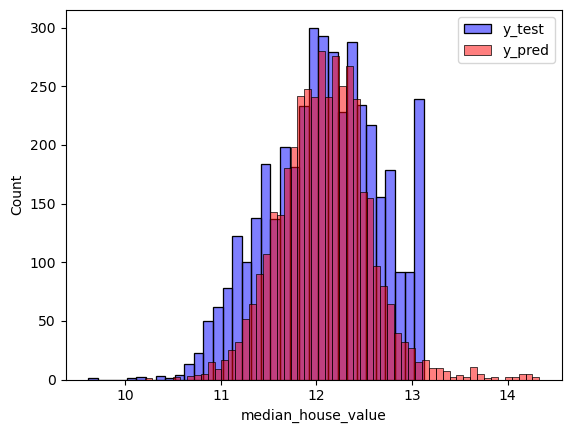

In [24]:
sns.histplot(y_test, color='b', alpha=0.5, label='y_test')
sns.histplot(y_test_pred, color='r', alpha=0.5, label='y_pred')
plt.legend();